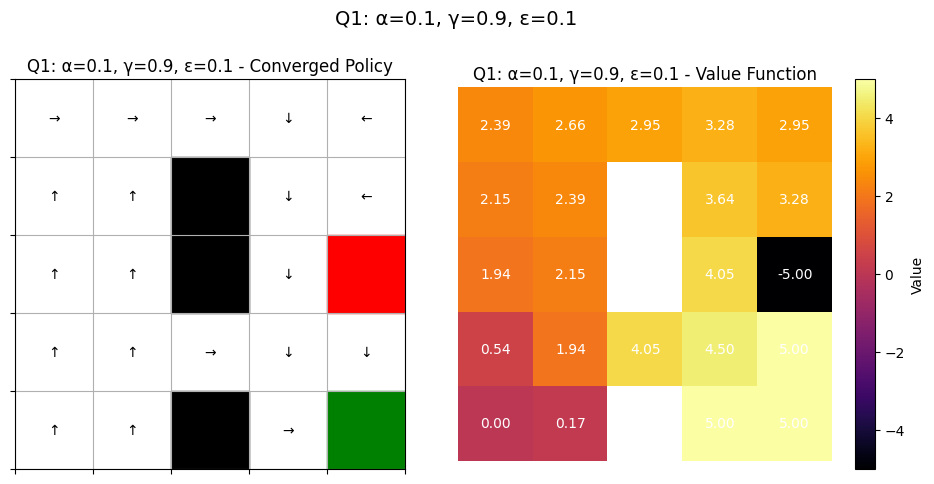

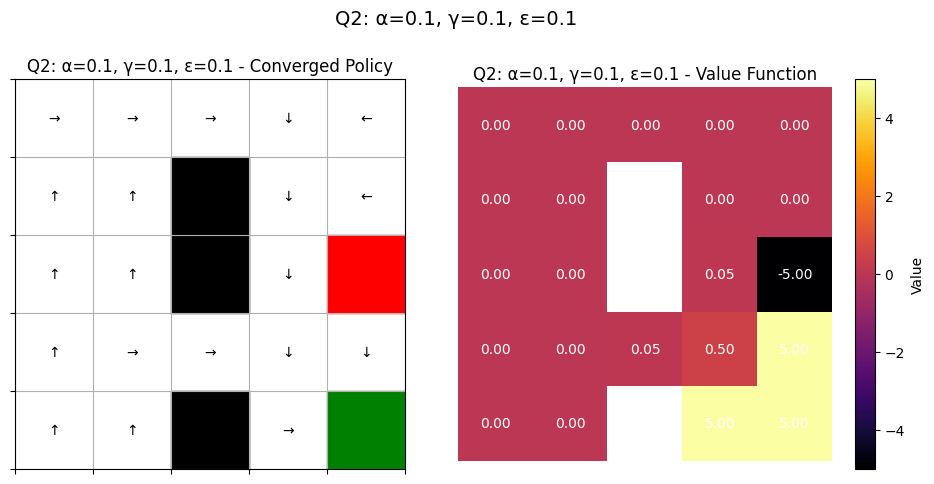

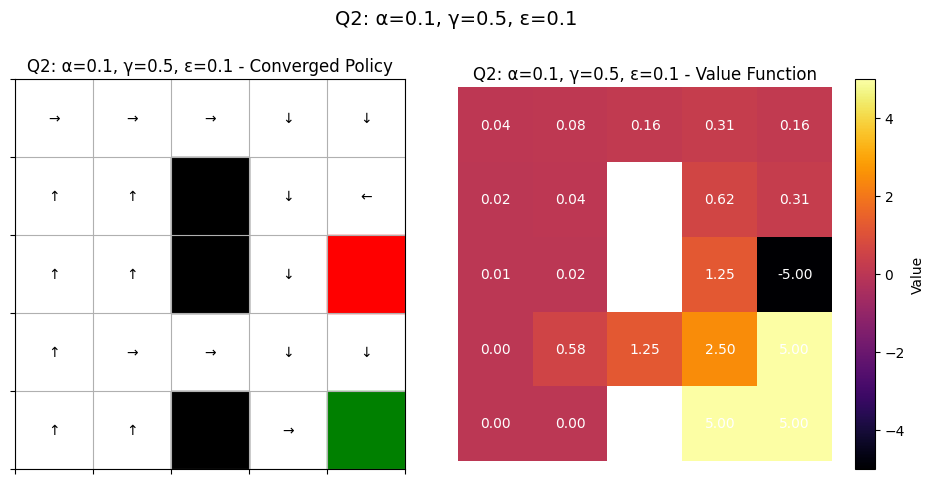

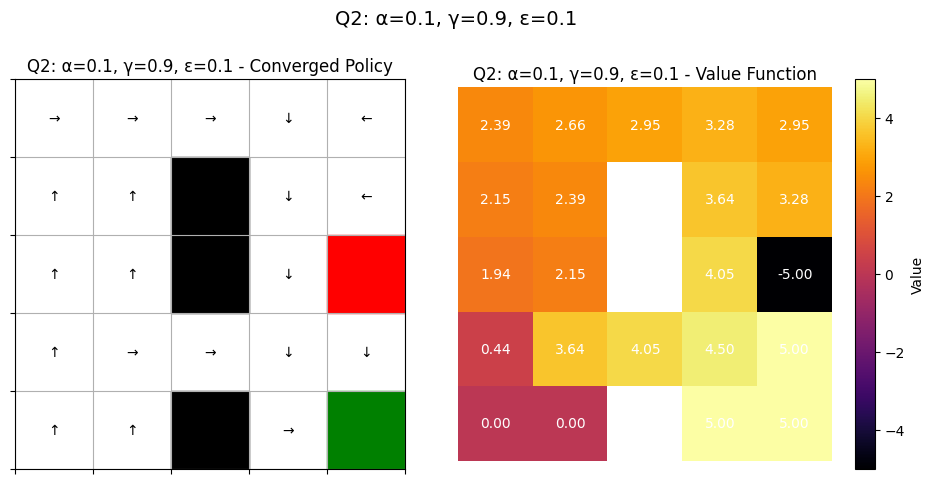

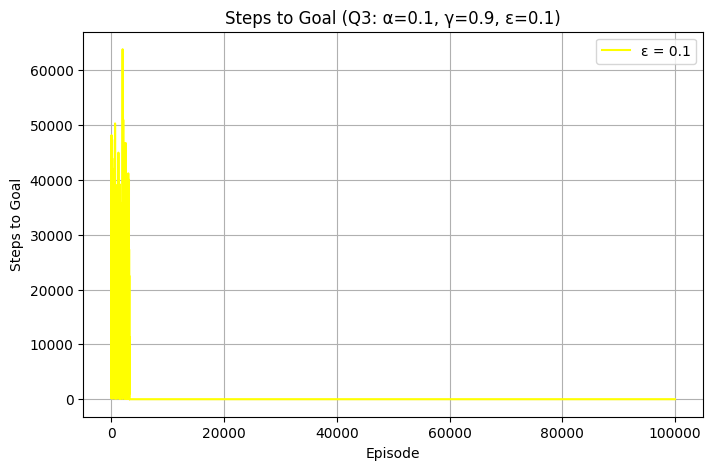

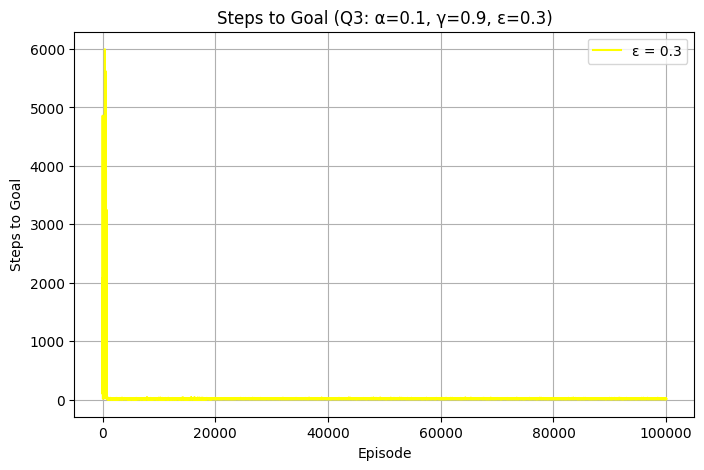

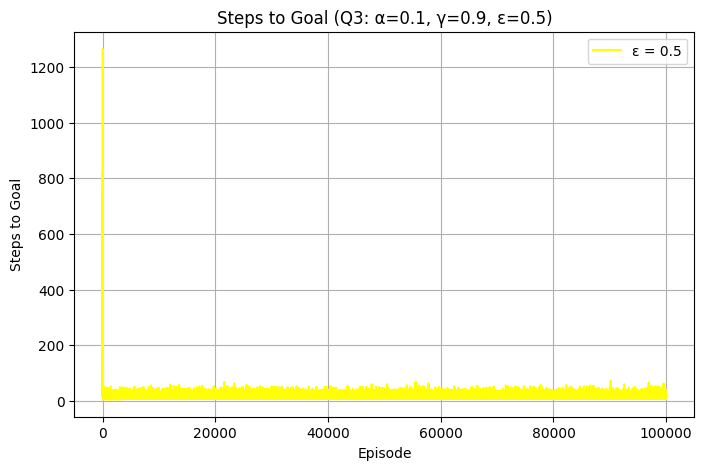

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define grid dimensions and initial state
grid_size = 5
start_state = (0, 0)
goal_state = (4, 4)
trap_state = (2, 4)
obstacles = [(1, 2), (2, 2), (4, 2)]

# Define rewards
reward_goal = 5
reward_trap = -5
reward_boundary = -1
reward_else = 0

# Define actions and their effects
actions = ['up', 'down', 'left', 'right']
action_effects = {'up': (-1, 0), 'down': (1, 0), 'left': (0, -1), 'right': (0, 1)}

# Function to initialize Q-values
def initialize_q_values():
    return np.zeros((grid_size, grid_size, len(actions)))

# Function to perform Q-Learning
def q_learning(Q, alpha, gamma, epsilon, episodes):
    steps_to_goal = []
    for episode in range(episodes):
        state = start_state
        step_count = 0
        while state != goal_state and state != trap_state:
            step_count += 1
            if np.random.rand() < epsilon:
                action = np.random.choice(actions)
            else:
                action = actions[np.argmax(Q[state[0], state[1]])]

            next_state = get_next_state(state, action)
            reward = get_reward(next_state)

            best_next_action = np.argmax(Q[next_state[0], next_state[1]])
            td_target = reward + gamma * Q[next_state[0], next_state[1], best_next_action]
            td_error = td_target - Q[state[0], state[1], actions.index(action)]
            Q[state[0], state[1], actions.index(action)] += alpha * td_error

            state = next_state

        steps_to_goal.append(step_count)

    return Q, steps_to_goal

# Function to get next state based on action
def get_next_state(state, action):
    effect = action_effects[action]
    next_state = (state[0] + effect[0], state[1] + effect[1])
    if (0 <= next_state[0] < grid_size and 0 <= next_state[1] < grid_size
            and next_state not in obstacles):
        return next_state
    else:
        return state  # Stay in place if hitting boundary or obstacle

# Function to get reward based on next state
def get_reward(next_state):
    if next_state == goal_state:
        return reward_goal
    elif next_state == trap_state:
        return reward_trap
    elif is_out_of_bounds(next_state) or next_state in obstacles:
        return reward_boundary  # Negative reward for hitting boundary or obstacle
    else:
        return reward_else

# Function to check if state is out of bounds
def is_out_of_bounds(state):
    return not (0 <= state[0] < grid_size and 0 <= state[1] < grid_size)

# Function for plotting policy and value function
def plot_policy_value_function(Q, title):
    policy = np.zeros((grid_size, grid_size), dtype=str)
    value_function = np.zeros((grid_size, grid_size))

    for i in range(grid_size):
        for j in range(grid_size):
            if (i, j) in obstacles:
                policy[i, j] = 'B'
                value_function[i, j] = np.nan
            elif (i, j) == goal_state:
                policy[i, j] = 'G'
                value_function[i, j] = reward_goal
            elif (i, j) == trap_state:
                policy[i, j] = 'T'
                value_function[i, j] = reward_trap
            else:
                best_action = np.argmax(Q[i, j])
                policy[i, j] = actions[best_action][0].upper()
                value_function[i, j] = np.max(Q[i, j])

    # Correct the grid orientation for plotting
    def correct_orientation(array):
        return np.flipud(array)

    policy = correct_orientation(policy)
    value_function = correct_orientation(value_function)

    # Plotting
    plt.figure(figsize=(10, 5))

    # Plot the policy
    plt.subplot(1, 2, 1)
    plt.title(f'{title} - Converged Policy')
    plt.imshow(np.zeros((grid_size, grid_size)), cmap='gray', alpha=0)  # Transparent background
    for i in range(grid_size):
        for j in range(grid_size):
            if policy[i, j] == 'B':
                plt.gca().add_patch(plt.Rectangle((j-0.5, i-0.5), 1, 1, fill=True, color='black'))
            elif policy[i, j] == 'G':
                plt.gca().add_patch(plt.Rectangle((j-0.5, i-0.5), 1, 1, fill=True, color='green'))
            elif policy[i, j] == 'T':
                plt.gca().add_patch(plt.Rectangle((j-0.5, i-0.5), 1, 1, fill=True, color='red'))
            else:
                arrow_dict = {'U': '↑', 'D': '↓', 'L': '←', 'R': '→'}
                plt.text(j, i, arrow_dict[policy[i, j]], ha='center', va='center', color='black')

    plt.gca().invert_yaxis()
    plt.grid(True)  # Add grid lines
    plt.xticks(np.arange(-0.5, grid_size, 1), [])
    plt.yticks(np.arange(-0.5, grid_size, 1), [])
    plt.axis('on')

    # Plot the value function
    plt.subplot(1, 2, 2)
    plt.title(f'{title} - Value Function')
    plt.imshow(value_function, cmap='inferno')  # Change colormap to 'inferno'
    for i in range(grid_size):
        for j in range(grid_size):
            if not np.isnan(value_function[i, j]):
                plt.text(j, i, f'{value_function[i, j]:.2f}', ha='center', va='center', color='white')

    plt.colorbar(label='Value')
    plt.gca().invert_yaxis()
    plt.axis('off')

    plt.suptitle(f'{title}', fontsize=14)  # Add overall title
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout for title
    plt.show()

# Function for plotting steps to goal
def plot_steps_to_goal(steps_to_goal, params):
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, len(steps_to_goal) + 1), steps_to_goal, label=f'ε = {params["epsilon"]}', color='yellow')  # Change color to yellow
    plt.title(f'Steps to Goal ({params["title"]})')
    plt.xlabel('Episode')
    plt.ylabel('Steps to Goal')
    plt.legend()
    plt.grid(True)
    plt.show()

# Initialize random seed
np.random.seed(None)  # Keep a random seed

# Hyperparameters
alpha = 0.1  # Learning rate
epsilon = 0.1  # Epsilon for exploration
episodes = 100000  # Number of episodes

# Part 1: Plot the converged policy and value function (Q1)
Q = initialize_q_values()
Q, _ = q_learning(Q, alpha, 0.9, epsilon, episodes)
plot_policy_value_function(Q, f'Q1: α={alpha}, γ=0.9, ε={epsilon}')

# Part 2: Vary gamma values and plot policy and value function (Q2)
gamma_values = [0.1, 0.5, 0.9]
for gamma in gamma_values:
    Q = initialize_q_values()
    Q, _ = q_learning(Q, alpha, gamma, epsilon, episodes)
    plot_policy_value_function(Q, f'Q2: α={alpha}, γ={gamma}, ε={epsilon}')

# Part 3: Plot steps to goal for different epsilon values with gamma = 0.9 (Q3)
epsilon_values = [0.1, 0.3, 0.5]
for epsilon in epsilon_values:
    Q = initialize_q_values()
    Q, steps_to_goal = q_learning(Q, alpha, 0.9, epsilon, episodes)
    plot_steps_to_goal(steps_to_goal, {"title": f'Q3: α={alpha}, γ=0.9, ε={epsilon}', "epsilon": epsilon})
